In [1]:
from mlpipeline_analyzer import PipelineDiagram
from sklearn.svm import SVC
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.discriminant_analysis import *
from sklearn.impute import *
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
import numpy as np
import joblib
#import pickle

def custom_function(set=1):
    s = 'Hello'*set
    return
    
model = SVC(C=1.0, kernel='poly', degree=5, gamma='scale')
sklearn_pipeline = Pipeline([('custom',custom_function(set=10)), ('labelencoder',LabelEncoder()), #-- Pipe Transformer 1
                     ("imputer", SimpleImputer(missing_values=np.nan, strategy='mean')), #-- Pipe Transformer 2
                     ('scale', FeatureUnion([
                ('minmax', MinMaxScaler()),    #-- Parallel Transformer 3
                ('standardscaler', StandardScaler()),  #-- Parallel Transformer 4
                ('normalize', Normalizer())])),#-- Parallel Transformer 5
                     ('feature_select', RFE(estimator = model, n_features_to_select=1)), #-- Pipe Transformer 6
                     ('PCA', PCA(n_components=1)), #-- Pipe Transformer 7
            ("LDA", LinearDiscriminantAnalysis()), #-- Pipe Transformer 8
            #('classifier', model), 	      #-- Pipe Classifier/Predictor 9
('voting', RandomForestClassifier(n_estimators=10))]) 	      #-- Pipe Classifier/Predictor 10

joblib.dump(sklearn_pipeline , 'models/ml_pipeline.pkl')

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


['models/ml_pipeline.pkl']

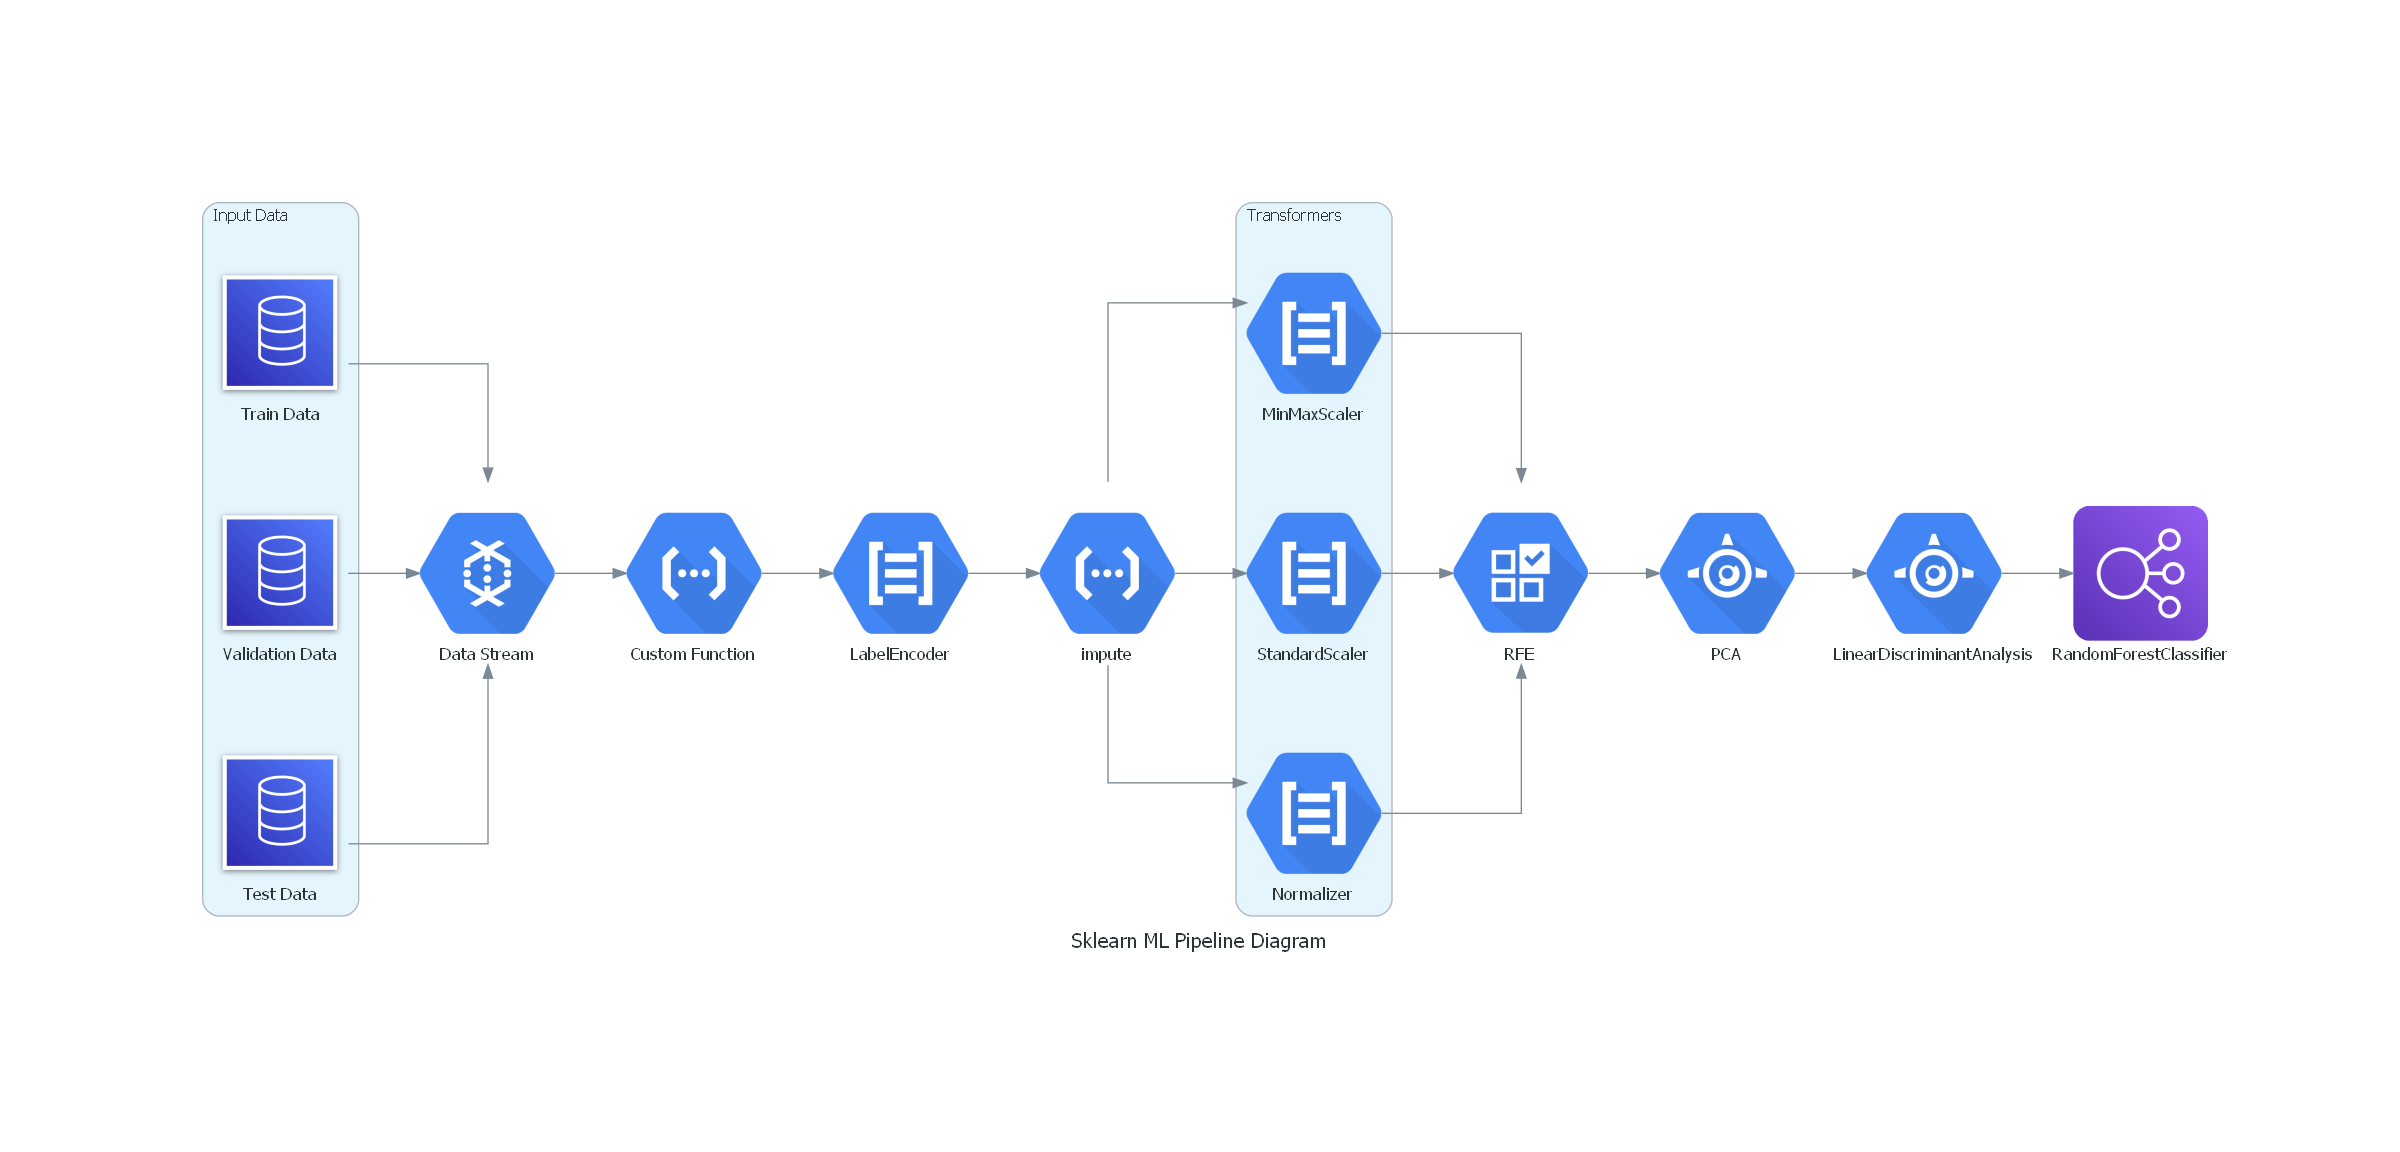

In [5]:
sklearn_pipeline = joblib.load('models/ml_pipeline.pkl')
a = PipelineDiagram(sklearn_pipeline)
a.show(title='Sklearn ML Pipeline Diagram')
a.show_params(title='Sklearn Machine Learning Parameters Pipeline')

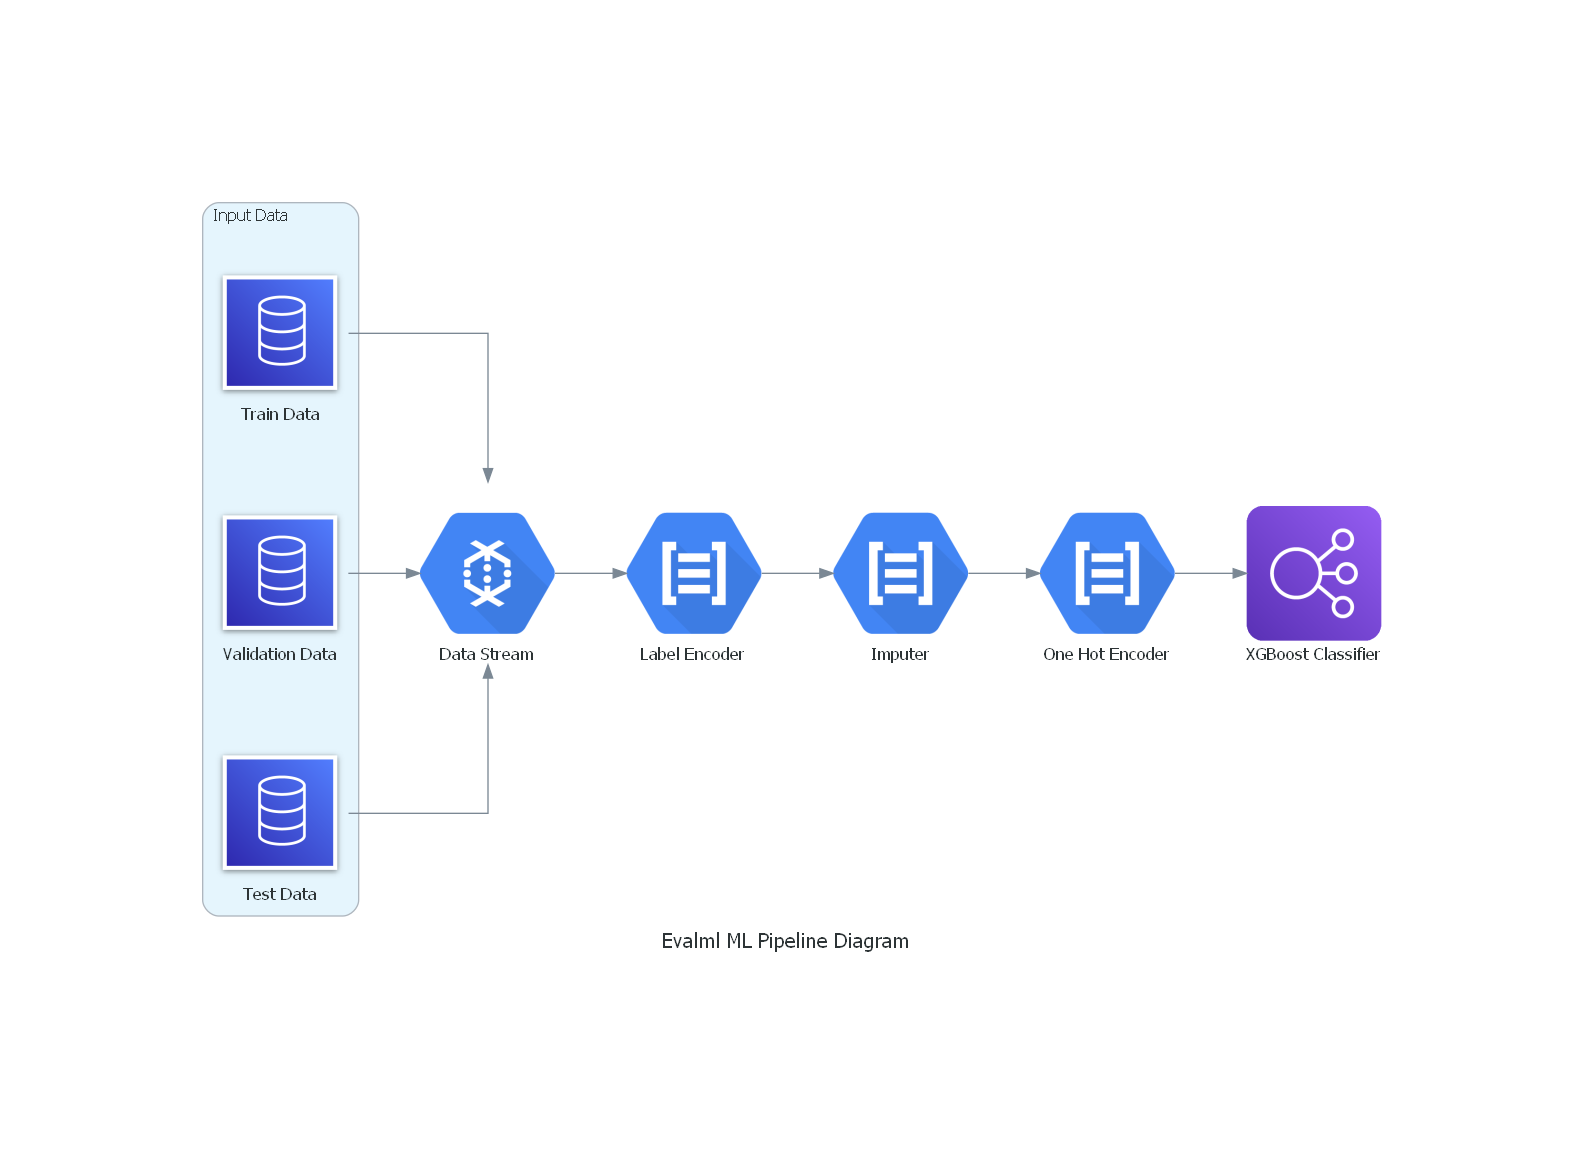

In [6]:
evalml_pipeline = joblib.load('models/automl_pipeline.pkl')
b = PipelineDiagram(evalml_pipeline)
b.show(title='Evalml ML Pipeline Diagram')
b.show_params(title='Evalml Machine Learning Parameters Pipeline')

In [76]:
from evalml.automl import AutoMLSearch
import evalml
X, y = evalml.demos.load_breast_cancer()
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type='binary')
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()
pipeline = automl.best_pipeline
a = PipelineDiagram(pipeline)
a.show()
a.show_params()